# Part 1: k Nearest Neighbors

We will first do all the necessary imports to run the code

In [13]:
from scipy import stats #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy.spatial import distance_matrix

## Exercise 1: Understanding the kNN classifier and implementing the Minkowski distance
The class below contains the basic functionality of a **kNN classifier**. Go through the code and read the comments in it to understand the different operations. 

In [14]:
class KNN:
    '''
    k nearest neighboors algorithm class
    __init__() initialize the model
    train() trains the model
    predict() predict the class for a new point
    '''

    def __init__(self, k):
        '''
        INPUT :
        - k : is a natural number bigger than 0 
        '''

        if k <= 0:
            raise Exception("Sorry, no numbers below or equal to zero. Start again!")
            
        # empty initialization of X and y
        self.X = []
        self.y = []
        # k is the parameter of the algorithm representing the number of neighborhoods
        self.k = k
        
    def train(self,X,y):
        '''
        INPUT :
        - X : is a 2D Nx2 numpy array containing the coordinates of points
        - y : is a 1D Nx1 numpy array containing the labels for the corrisponding row of X
        '''        
        
        self.X=X.copy() # copy your training points
        self.y=y.copy()
       
    def predict(self,X_new,p):
        '''
        INPUT :
        - X_new : is a Mx2 numpy array containing the coordinates of new points whose label has to be predicted
        
        OUTPUT :
        - y_hat : is a Mx1 numpy array containing the predicted labels for the X_new points
        ''' 
            
        dst = self.minkowski_dist(X_new, p) #Estimates the Minkowski distance, order p, of a set of X_new points to the data in the training set.
        ordered = np.argsort(dst, axis=1) # Orders all distances in ascending order
        neighbors = y[ordered[:,0:self.k]] #For every point in the test set, picks the k closest points in the training set
        y_hat, _ = stats.mode(neighbors, axis=1) #As seen in the lecture, we use the mode to assign labels to the new data

        return y_hat
    
    def minkowski_dist(self,X_new,p):
        '''
        INPUT : 
        - X_new : is a Mx2 numpy array containing the coordinates of points for which the distance to the training set X will be estimated
        - p : parameter of the Minkowski distance
        
        OUTPUT :
        - dst : is an MxN numpy array containing the distance of each point in X_new to X
        '''
        ######### Task 1.2 YOUR CODE HERE - do not delete this line ################
        
        ## First implementation: inefficient, too slow
        #dst = np.empty([X_new.shape[0], self.X.shape[0]]) # declare MxN dst uninitialized
        # for i, x_new in enumerate(X_new):
        #     for j, x in enumerate(self.X):
        #         dst[i, j] = np.sum(np.abs(np.subtract(x_new, x))**p)**(1/p)
        
        X_new_expanded = np.expand_dims(X_new, axis=1) # Add a new dimension to exploit numpy broadcast: Mx2 -> Mx1x2
        dst = np.sum(np.abs(np.subtract(X_new_expanded, self.X))**p, axis=-1)**(1/p)
        ######## Task 1.2 END OF YOUR CODE HERE - do not delete this line ##########
        
        return dst

#### Task 1.1. The function `np.argsort`
Investigate the role of the function `np.argsort`. What is it doing in the code? 

**Hint:** Use the help function in the cell below to display the documentation

In [15]:
help(np.argsort)

Help on function argsort in module numpy:

argsort(a, axis=-1, kind=None, order=None)
    Returns the indices that would sort an array.
    
    Perform an indirect sort along the given axis using the algorithm specified
    by the `kind` keyword. It returns an array of indices of the same shape as
    `a` that index data along the given axis in sorted order.
    
    Parameters
    ----------
    a : array_like
        Array to sort.
    axis : int or None, optional
        Axis along which to sort.  The default is -1 (the last axis). If None,
        the flattened array is used.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
        and 'mergesort' use timsort under the covers and, in general, the
        actual implementation will vary with data type. The 'mergesort' option
        is retained for backwards compatibility.
    
        .. versionchanged:: 1.15.0.
           The 'stab

__Answer__

In the `predict` method, `np.argsort` is used to obtain an ordered index (ascending) into the array of minkowski distances (`ordered`).
This index is then used to select the $k$ nearest neighbours of the prediction points by using the first $k$ indices from the `ordered` list.

#### Task 1.2. Implement the Minkowski distance
You will notice that the implementation of the Minkowski distance is missing. Your first task is to code it. As a reminder, the Minkowski distance, between two $D$-dimensional points $\mathbf{x}$ and $\mathbf{z}$ is defined as: 

\begin{equation}
		\text{dist}(\textbf{x},\textbf{z}) = \left( \sum_{j=1}^D |x_j -z_j|^p\right)^{1/p}
	\end{equation}
    
Write your code where is indicated in the cell corresponding to the kNN class.   

**Tips:** Read carefully the documentation of the function, as the output should be compliant with what is written there. You may want to test your implementation, outside the kNN classifier, using simple examples.  

## Exercise 2: Testing the code
In this exercise you will run the kNN classifier in some data, to gain understanding of its behavior. 

In [16]:
import utils

We will rely on the utils.py file, which was imported in the cell above, to generate our training data using the function `gaussians(N)`. This function generates two multivariate Gaussian distributions, each containing N number of points. 

#### Question 2.1 Understanding the `gaussians` function
Inspect the code of the function `gaussians(N)` within the utils.py file. 
1. What are the means and covariances of each distribution? 
2. What is the dimension $D$ of $\mathbf{X}$? 
3. Which values can $y$ take? 

1. mean(0, 0) cov([0.5, 0],[0, 0.5])
mean(1, 1) cov([1, 0], [0, 1])
2. It is bidimensional
3. It is 0 for the first distribution and 1 for the second.

In [17]:
X, y = utils.gaussians(100) #We create 100 points from each distribution. Input data (observations) are stored in X and the labels in y.

As testing set, we will create a grid of points covering the range of $\mathbf{X}$. Study the code snippet below and try to understand what is being done.

In [18]:
# Create a grid of testing points
h=.02 # space in the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx is the x-axis coordinate of the points in the test set
# yy is the y-axis coordinate of the points in the test set
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# X_test contains the test set inputs (xx,yy)
X_test = np.c_[xx.ravel(), yy.ravel()]

#### Question 2.2 `np.meshgrid`
What is the function `np.meshgrid` doing? Use the help function (`help(name_of_function)`) to answer the question.

In [19]:
help(np.meshgrid)

Help on function meshgrid in module numpy:

meshgrid(*xi, copy=True, sparse=False, indexing='xy')
    Return coordinate matrices from coordinate vectors.
    
    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.
    
    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.
    
    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.
    
        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True a sparse grid is returned in order to conserve memory.
        Default is False.
    
        .. versionadded:: 1.7.0
    copy : bool, optional
        If False, a view into the original arrays are returned in order to
        conserve memory.  Default

#### Task 2.1 Running kNNs
Now it is time to test the kNN classifier. We will use k=3 to start with. We will use the function `plot_results(args)` in the utils file to visualize the obtained results. Please inspect the code of the function and try to understand it.

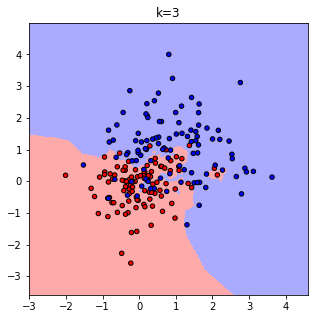

In [20]:
# Parameter K defining the KNN algorithm
k=3
# Create a model for the KNN with inputs the ones from the gaussians and test the model using the grid of testing points
knn_model_k3 = KNN(k)
knn_model_k3.train(X, y)
y_test_k3=knn_model_k3.predict(X_test,2)
# Put the result into a color plot
y_test_k3 = y_test_k3.reshape(xx.shape)
utils.plot_results(xx,yy, X, y, y_test_k3, "k=" + str(k))

#### Question 2.3 Analysing the results
What do you think of the obtained results? Are they good? Are there any misclassified points? What do the colors in the background denote? 

Your answer here:

Because we are using the training data (the points in the graph) for evaluating the model, our answers will not reflect the true performance of the model on a proper validation/test set.

_What do you think of the obtained results? Are they good?_  
The obtained result is quite good even if a considerable portion of points would be misclassified. The splitting of the space in to the two areas seem to be sensible given the training data.

_Are there any misclassified points?_  
Yes, even if we look at the training data set, there are couple of points which would be misclassified by the model.

What do the colors in the background denote?  
The label that the model would assign to a point in that area.

#### Task 2.2 Assessing different values of k
Create different kNN classifiers using different values of $k$. Namely, $k=[1,5,10,50,100]$

**Bonus:** If you feel brave, you can try to create a figure with all the subplots (one per k), rather than having them in separate cells. 

In [ ]:
Ks = [1, 5, 10, 50, 100]

######### Task 2.2 YOUR CODE HERE - do not delete this line ################

# Create subplots
ncols = int((len(Ks) + 1) / 2)
fig, axs = plt.subplots(nrows=2, ncols=ncols, figsize=(7.5, 5))

for i, k in enumerate(Ks):
    # Create a model for the KNN with inputs the ones from the gaussians and test the model using the grid of testing points
    knn_model = KNN(k)
    knn_model.train(X, y)
    y_test = knn_model.predict(X_test,2)
    # Put the result into a color plot
    y_test = y_test.reshape(xx.shape)
    utils.plot_results_in_subplot(xx,yy, X, y, y_test, "k=" + str(k), axs[int(i%2), int(i/2)])

# Remove unused cells in subplot
for i in range(len(Ks), ncols*2):
    axs[int(i%2), int(i/2)].remove()

# Adjust spacing for titles
plt.tight_layout()
    
######### Task 2.2 YOUR CODE ENDS HERE - do not delete this line ################

#### Question 2.4 Differences between k's
What differences do you observe as you vary k? What occurs when $k=1$? When $k=N$? Which value would you choose?

_What differences do you observe as you vary k?_  
The boundaries becomes more rudimentary with high ks.

_What occurs when $k=1$?_  
Each point will be labeled like its closest neighbour. Looking at the training set for testing, we obtain 100% accuracy because each point is its own closest neighbour.

_When $k=N$?_  
With k=200 all the points would be labeled the same. Since the training set is perfectly balanced, the classification could lead to $y=1$ for any x or to $y=0$ for any x.

_Which value would you choose?_  
Between the different Ks used, by eye k = 5 and k = 10 seems to be the best option. So we would probably choose a value beetween 5 and 10.


#### Question 2.5 Good practices in machine learning
According to what we saw during our first lecture, the procedure we are following to identify the good value of $k$ may be wrong. Do you agree? Justify your answer.

Yes, we are evaluating the model using only the training data, this could lead to overfitting and to a bad model choice.  
For example, considering only training data, k=1 could look like a good choice, while with a proper validation set it probably wouldn't.

### Final remark: kNNs implementation
In the two previous exercises, we have used a "home made" implementation of the kNNs algorithm. This implementation serves for academic purposes, but may not prove robust applications.

If you are interested in further working with the kNNs algorithm, you may want to discover its implementation in the scikit-learn library:

* [Nearest Neighbors in Scikit-learn](https://scikit-learn.org/stable/modules/neighbors.html)

## Exercise 3: The curse of dimensionality
In this final exercise, we will investigate the weaknesses of the kNN algorithm.

Suppose we have a D dimension hypercube with all sides of length 1 in the Cartesian map, i.e. $[0,1]^D$. 

We sample the training data **uniformly** from this hypercube, i.e. $\forall \, i, \mathbf{x}_i \in [0,1]^D$.

Assume we will use $k=10$ to define the label of a test point.

#### Question 3.1 Estimating the space taken by the k-nearest neighbors 
Let $l$ be the edge length of the smallest hypercube that contains all k-nearest neighbor of a test point. What is the approximate volume of the hyercube? What is the length of $l$? Express your answers in terms of $k$, $D$ (the dimensions) and $N$ the number of training points.

\begin{equation}
volume=\frac{k}{N}
\end{equation}

<!-- Full derivation of the volume -->
<!-- \begin{equation}
{volume=l^D={\left(\frac{k}{N}\right)}^{\frac{1}{D} * D}=\frac{k}{N}}
\end{equation} -->

\begin{equation}
{l=\left(\frac{k}{N}\right)}^{1/D}
\end{equation}

#### Task 3.1 Exploring the behavior of $l$
Using the expression you found for $l$ in the previous question, estimate the size of $l$ as a fuction of $D$. Assume a training set size $N=1000$. Store the values in a numpy array named l_values.

In [ ]:
D=np.arange(2,10000,10)

######### Task 3.1 YOUR CODE HERE - do not delete this line ################
N = 1000
k = 10
l_values = (k/N) ** np.divide(1.0, D)
######### Task 3.1 YOUR CODE ENDS HERE - do not delete this line ################

sns.lineplot(x = D, y = l_values)
plt.title('Edge length l of the smallest hypercube containing 10 nearest neighbors as a function of the dimension D')
plt.xlabel('D')
plt.ylabel('$l$')
plt.show()

In [ ]:
#Let us visualize the same results using a log scale
sns.lineplot(x = np.log(D), y = l_values)
plt.title('Edge length l of the smallest hypercube containing 10 nearest neighbors as a function of log(D)')
plt.xlabel('log(D)')
plt.ylabel('$l$')
plt.show()

#### Question 3.2 Analysis
What can you say about the obtained results? What happens with $l$ as $D \gg 0$? What consequences this may have for the k nearest neighbor algorithm? 

__Answers__

_What can you say about the obtained results?_

With $D$ increasing the length of the edge $l$ becomes very large (close to 1) very quickly.
Therefore the neighbourhood is nearly the whole data space.

_What happens with $l$ as $D >> 0$?_

As $D$ grows $l$ approaches 1.0 exponentially.
Which means the neighbouring points are very speard out in our data space because as $l$ approaches 1.0 the neighbourhood of our test point becomes nearly the whole data space (wich is a hypercube with edges of length 1.0).

_What consequences this may have for the $k$ nearest neighbour algorithm?_

The primary consequence for the $k$ nearest neighbour algorithm is that the concept of neighbourhood does no longer work very well.
This results in sub optimal predictions by the algorithm due to the big spread of neighbouring points.

#### Task 3.2 Finding a good training set size (N)
Let us suppose that your training set $\mathcal{D} \in \mathbb{R}^{20}$. You really want to use the k-nearest neighbor classifier. However, from the previous results, it seems that with a dataset of $N=1000$ the search space is too large. Plot different values of $N$ to identify when will $l \leq 0.2$. You may assume $k=10$. Plot an horizontal bar at $l=0.2$ to assist your analysis. 

In [ ]:
######### Task 3.2 YOUR CODE HERE - do not delete this line ################
N = np.arange(100, 10000000, 1000)

D = 20
k = 10.0
l_values = np.divide(k, N) ** (1.0/D)

sns.lineplot(x = N, y = l_values)
plt.axhline(0.2)
plt.title('Edge length l of the smallest hypercube containing 10 nearest neighbors as a function of the size of the dataset N')
plt.xlabel('N')
plt.ylabel('$l$')
plt.show()

######### Task 3.2 YOUR CODE ENDS HERE - do not delete this line ################


#### Question 3.3 Analysis
What do these results suggest? Does it seem feasible to find a dataset that fits your needs?

__Answer:__

No the results suggest that it seems very unreasonable to find a dataset that would fit the needs of this model.

#### Question 3.4 The Curse of Dimensionality
The phenomenon that you are observing is well-known. It is known as the curse of dimensionality. Investigate about it and explain it using **your own words**. Copy-pasted text will represent a mark zero to the question.

__Answer__

> TODO this is a work-in-progres

The phenomenon called "The Curse of Dimensionality" appeares in many different domains, such as Machine Learning, Optimization, Data mining etc. .
It boils down to the fact that highly complex data (with many dimensions) requires enourmous amounts of data (exponential in most cases) to cover the space created by the data in a meaningful way.
This exponential growth can be seen for example in the volume of an $n$-dimensional hyper-cube, which is $volume = l^n$ with $l$ being the length of the edges of the hyper-cube. Here we can see that the volume will grow exponentially in $\mathcal{O}(l^n)$ (if $l > 1$)

Another aspect of the curse of dimensionality is the difficulty in detecting which dimensions have interactions with each other and which ones might be completely irrelevant for a given problem.
Additionally, due to the big posibility space created by high dimensional data, finding answers to those questions is impossible for a human and even for a computer only possible with extremely large ammounts of data.